In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
raw_data = pd.read_csv("Fulani Herdsmen Data/guardian-Table 1.csv")
raw_data.head()

,YEAR,PAPER,DATE OF REPORT,DATE OF INCIDENT,LOCATION,HEADLINE,LINK
0,2017.0,Guardian,20-Mar-17,NaN,NaN,Tension as Fulani herdsman murders farmer in O...,https://guardian.ng/news/tension-as-fulani-her...
1,NaN,NaN,28-Sep-17,NaN,NaN,Why Nigeria did not declare Fulani herdsmen as...,https://guardian.ng/news/why-nigeria-did-not-d...
2,NaN,NaN,3-Nov-17,NaN,NaN,Fulani herdsmen? Here are the grim statistics,https://guardian.ng/opinion/fulani-herdsmen-he...
3,2018.0,Guardian,3-Jan-18,1-Jan-18,Logo and Guma Local Government Areas (LGA) of ...,Herdsmen kill 50 in Benue communities,https://guardian.ng/news/herdsmen-kill-50-in-b...
4,NaN,NaN,6-Jan-18,NaN,NaN,Why we attacked Benue communities – Herdsmen,https://guardian.ng/news/why-we-attacked-benue...


In [3]:
raw_data.columns

Index(['YEAR', 'PAPER', 'DATE OF REPORT', 'DATE OF INCIDENT', 'LOCATION',
       'HEADLINE', 'LINK'],
      dtype='object')

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              3 non-null      float64
 1   PAPER             3 non-null      object 
 2   DATE OF REPORT    96 non-null     object 
 3   DATE OF INCIDENT  13 non-null     object 
 4   LOCATION          23 non-null     object 
 5   HEADLINE          96 non-null     object 
 6   LINK              96 non-null     object 
dtypes: float64(1), object(6)
memory usage: 5.4+ KB


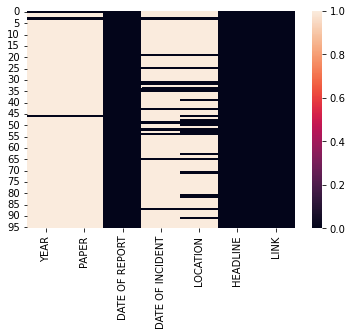

In [5]:
sns.heatmap(raw_data.isnull())
plt.show()

In [6]:
raw_data.dtypes

YEAR                float64
PAPER                object
DATE OF REPORT       object
DATE OF INCIDENT     object
LOCATION             object
HEADLINE             object
LINK                 object
dtype: object

In [7]:
def valid_datetime_string(string):

    try:
        pd.Timestamp(string)
    except:
        return False
    
    return True

In [8]:
clean = raw_data[raw_data['DATE OF REPORT'].map(valid_datetime_string)]
clean.head()

,YEAR,PAPER,DATE OF REPORT,DATE OF INCIDENT,LOCATION,HEADLINE,LINK
0,2017.0,Guardian,20-Mar-17,NaN,NaN,Tension as Fulani herdsman murders farmer in O...,https://guardian.ng/news/tension-as-fulani-her...
1,NaN,NaN,28-Sep-17,NaN,NaN,Why Nigeria did not declare Fulani herdsmen as...,https://guardian.ng/news/why-nigeria-did-not-d...
2,NaN,NaN,3-Nov-17,NaN,NaN,Fulani herdsmen? Here are the grim statistics,https://guardian.ng/opinion/fulani-herdsmen-he...
3,2018.0,Guardian,3-Jan-18,1-Jan-18,Logo and Guma Local Government Areas (LGA) of ...,Herdsmen kill 50 in Benue communities,https://guardian.ng/news/herdsmen-kill-50-in-b...
4,NaN,NaN,6-Jan-18,NaN,NaN,Why we attacked Benue communities – Herdsmen,https://guardian.ng/news/why-we-attacked-benue...


In [9]:
clean['DATE OF REPORT'] = pd.to_datetime(clean['DATE OF REPORT'])
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 95
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   YEAR              3 non-null      float64       
 1   PAPER             3 non-null      object        
 2   DATE OF REPORT    95 non-null     datetime64[ns]
 3   DATE OF INCIDENT  13 non-null     object        
 4   LOCATION          23 non-null     object        
 5   HEADLINE          95 non-null     object        
 6   LINK              95 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 5.9+ KB


/var/folders/j0/tm8cdfh92s1gygqzq23h32sc0000gn/T/ipykernel_21376/767432500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['DATE OF REPORT'] = pd.to_datetime(clean['DATE OF REPORT'])


In [10]:
labels = ["YEAR", "PAPER", "DATE OF INCIDENT", "LOCATION", "LINK"]
clean.drop(labels=labels, axis=1, inplace=True)
clean.head()

/var/folders/j0/tm8cdfh92s1gygqzq23h32sc0000gn/T/ipykernel_21376/2167403154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean.drop(labels=labels, axis=1, inplace=True)


,DATE OF REPORT,HEADLINE
0,2017-03-20,Tension as Fulani herdsman murders farmer in O...
1,2017-09-28,Why Nigeria did not declare Fulani herdsmen as...
2,2017-11-03,Fulani herdsmen? Here are the grim statistics
3,2018-01-03,Herdsmen kill 50 in Benue communities
4,2018-01-06,Why we attacked Benue communities – Herdsmen


In [11]:
import nltk

nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()

results = [sia.polarity_scores(line) for line in clean.HEADLINE]

scores_df = pd.DataFrame.from_records(results)
df = scores_df.join(clean, rsuffix="_right")
df['ID'] = df.index
df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/somto/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,neg,neu,pos,compound,DATE OF REPORT,HEADLINE,ID
0,0.441,0.559,0.0,-0.7430,2017-03-20,Tension as Fulani herdsman murders farmer in O...,0
1,0.291,0.709,0.0,-0.6249,2017-09-28,Why Nigeria did not declare Fulani herdsmen as...,1
2,0.381,0.619,0.0,-0.5719,2017-11-03,Fulani herdsmen? Here are the grim statistics,2
3,0.485,0.515,0.0,-0.6908,2018-01-03,Herdsmen kill 50 in Benue communities,3
4,0.375,0.625,0.0,-0.4588,2018-01-06,Why we attacked Benue communities – Herdsmen,4


In [12]:
negative = df.iloc[df.neg.idxmax()]
neutral = df.iloc[df.neu.idxmax()]
positive = df.iloc[df.pos.idxmax()]

print(f'Most negative: ({negative.HEADLINE}) {negative.neg}, {negative.neu}, {negative.pos}')
print(f'Most neutral: ({neutral.HEADLINE}) {neutral.neg}, {neutral.neu}, {neutral.pos}')
print(f'Most positive: ({positive.HEADLINE}) {positive.neg}, {positive.neu}, {positive.pos}')

Most negative: (20 Killed, many injured, as herdsmen attack Ortom’s village) 0.632, 0.368, 0.0
Most neutral: (Buhari and the herdsmen’s endgame) 0.0, 1.0, 0.0
Most positive: (Bauchi NSCDC deploys Agro Rangers to protect farmers, herdsmen) 0.0, 0.69, 0.31


In [15]:
import altair as alt

df["compound_trunc"] = df.compound.round(1) 

res = (df.groupby(["compound_trunc"])["ID"]
        .count()
        .reset_index()
        .rename(columns={"ID": "count"})
      )

hist = alt.Chart(res).mark_bar(width=15).encode(
    alt.X("compound_trunc:Q", axis=alt.Axis(title="Polarity Score")),
    y=alt.Y('count:Q', axis=alt.Axis(title="Number of headlines")),
    color=alt.Color('compound_trunc:Q', scale=alt.Scale(scheme='redyellowgreen')), 
    tooltip=['compound_trunc', 'count']
).properties(
    title="Polarity scores of Guardian Newspaper Herdsmen Headlines (2017-2019)"
)

hist

alt.Chart(...)

In [16]:
scatter = alt.Chart(df.sample(n=95, random_state=1)).mark_point().encode(
    alt.X("DATE OF REPORT", axis=alt.Axis(title="Date")),
    y=alt.Y('compound', axis=alt.Axis(title="Polarity Score")),
    color=alt.Color('compound:Q', scale=alt.Scale(scheme='redyellowgreen')), 
    tooltip=['HEADLINE','compound:Q', 'DATE OF REPORT']
).properties(
    title="Polarity scores of Guardian Newspaper Herdsmen Headlines (2017-2019)"
)

scatter

alt.Chart(...)